In [1]:
package ForestObservationDrone {
    
    import ForestObservationDroneDefinitions::**;
    
    part forrestObservationDrone {
        
        // Power System
        part battery;
        part charger;
        part powerManagementModule {
            port ctrlPort {
                out attribute status : BatteryStatusKind;
            }
            
            perform action checkStatus {
                out attribute status : BatteryStatusKind;
                
                first start;
                then action getBatteryStatus;
                then action analyseStatus;
                then done;
            } 
        }

        // Flight Control System
        part droneControlUnit {
            port powerCtrlPort {
                in attribute batteryStatus : BatteryStatusKind;
            }
        }
        part gpsModule;
        part inertialMeasurementUnit;
        part barometer;
        
        // Drone Frame
        part body;
        part rotors[4];
        part arms[4];
        part landingGear;
        
        // Communication System
        part radioTransmitter;
        part radioReceiver;
        part antenna;
        
        // Sensors
        part camera;
        part obstacleAvoidanceSensor;
        
        // Engine
        part engine1 : DroneEngine {
            :>> prop = PropKinds::clockwise;
        }
        part engine2 : DroneEngine {
            :>> prop = PropKinds::counterclockwise;
        }
        part engine3 : DroneEngine {
            :>> prop = PropKinds::clockwise;
        }        
        part engine4 : DroneEngine {
            :>> prop = PropKinds::counterclockwise;
        }
        
        connect droneControlUnit.powerCtrlPort to powerManagementModule.ctrlPort;
        connect battery to powerManagementModule;
        connect powerManagementModule to engine1;
        connect powerManagementModule to engine2;
        connect powerManagementModule to engine3;
        connect powerManagementModule to engine4;                    
    }
}

package ForestObservationDroneDefinitions {
    part def DroneEngine {
        attribute prop : PropKinds;
    }
    enum def PropKinds {
        enum clockwise;
        enum counterclockwise;
    }
    enum def BatteryStatusKind {
        enum full;
        enum medium;
        enum low;
        enum critical;
    }
}

Package ForestObservationDrone (5e4bbba0-9890-4036-b8a2-7aa1c2fa719d)
Package ForestObservationDroneDefinitions (38c08e5f-6fe1-4296-afbc-6f89ac8f04f1)


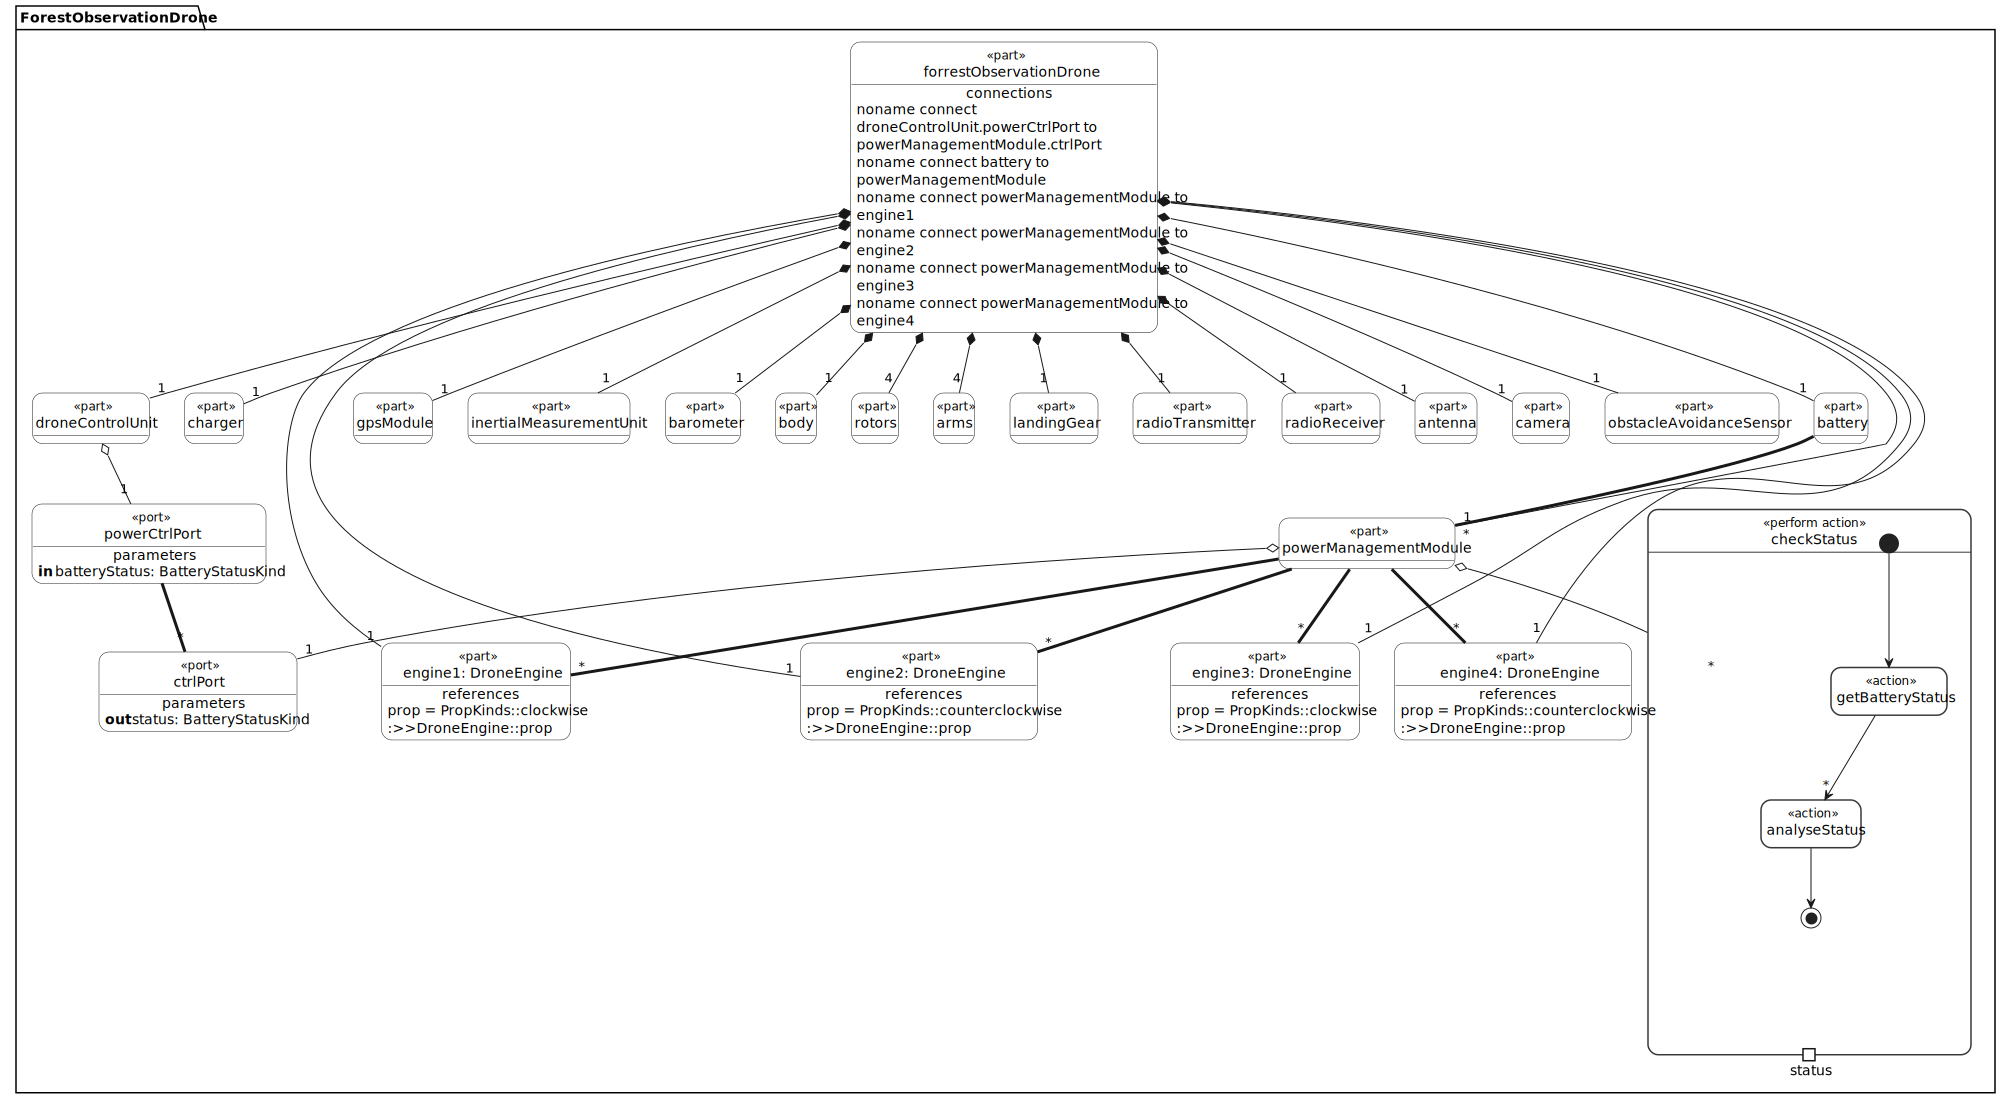

In [3]:
%viz ForestObservationDrone